## 패키지 import

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,740 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and dire

In [ ]:
# 폰트 설치 확인
import  matplotlib
import  matplotlib.font_manager  as fm
import  matplotlib.pyplot  as plt


sys_font  = fm.findSystemFonts ( )

[ font  for  font  in  sys_font  if  "Nanum"  in font ]

['/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf']

In [ ]:
# 나눔 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"

font_name  = fm.FontProperties(fname=font_path, size=12).get_name( )

print("◎ 폰트 이름 : ",font_name)

plt.rc("font", family= font_name)

◎ 폰트 이름 :  NanumGothic


In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install konlpy --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 32.3 MB/s eta 0:00:00


In [ ]:
!pip install nltk --q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud
import re

import tensorflow as tf
import torch
from torch.optim import AdamW, lr_scheduler

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import nltk
from konlpy.tag import Komoran
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, BertConfig

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# M-BERT

In [ ]:
file_path = '/content/drive/MyDrive/유런 24 여름 방학 프로젝트/eda&전처리/preprocessing_final.csv'
final_df = pd.read_csv(file_path)

last_df = pd.DataFrame()
last_df['title'] = final_df['processed_title']
last_df['label'] = final_df['label']

last_df

,title,label
0,재학생 신청 일정 안내,0
1,울산대학교 학점 교류 수학 안내,0
2,여름 계절제 학부 강의 정보 공유 설문 실시 안내,0
3,울산과학기술원 국내 대학 학점 교류 수학 안내,0
4,한국과학기술원 국내 교환 학점 교류 수학 안내,0
...,...,...
9418,추천 채용 정규직 추천 채용 안내,1
9419,예술 디자인 대학 조교 채용 공고,0
9420,근로 학생 모집,0
9421,조교 모집 안내,0


In [ ]:
# train/eval split

texts = last_df['title']
labels = last_df['label']

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size = 0.2, random_state = 42)

In [ ]:
# index initialization
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [ ]:
X_train_fixed = ['[CLS]' + str(text) + '[SEP]' for text in X_train]
X_test_fixed = ['[CLS]' + str(text) + '[SEP]' for text in X_test]

print(X_train_fixed)

['[CLS]세종 캠퍼스 사회봉사 신청 안내[SEP]', '[CLS]공개 채용 서울 과학 종합 대학원 신입 직원 채용 공고[SEP]', '[CLS]국가 근로 장학생 모집[SEP]', '[CLS]캡스톤 디자인 경진 대회 시행[SEP]', '[CLS]마이크로 디그 신청 안내[SEP]', '[CLS]상담 관리 운영 안내[SEP]', '[CLS]경제 통상 대학 계약직 직원 모집[SEP]', '[CLS]카운슬링 센터 여름 방학 집단 상담 참여자 신청[SEP]', '[CLS]hd현대 채용연계형[SEP]', '[CLS]신청 안내[SEP]', '[CLS]조교 채용 서울 캠퍼스 행정 조교 모집[SEP]', '[CLS]캠퍼스 기말 시험 시간표[SEP]', '[CLS]대학교 서포터즈 모집 안내[SEP]', '[CLS]분할 납부 신청 안내[SEP]', '[CLS]대학생 홍보[SEP]', '[CLS]홍보실 이화 캠퍼스 리더 모집[SEP]', '[CLS]교내 장학금 신청 공고[SEP]', '[CLS]안내[SEP]', '[CLS]기념[SEP]', '[CLS]아르바이트 모집 공고[SEP]', '[CLS]장학생 선발 공고[SEP]', '[CLS]추천 채용 안내[SEP]', '[CLS]대학원 연구원 모집[SEP]', '[CLS]학부 휴학 복학 신청 안내 notice fall semester[SEP]', '[CLS]공과대학 건축 학부 학사 조교 채용[SEP]', '[CLS]학부 일반 대학원 등록금 분할 납부 신청 안내 tuition installment plan undergrad general grad[SEP]', '[CLS]모집 하계 참가자[SEP]', '[CLS]삼성 드림 클래스 대학생 멘토 선발 안내[SEP]', '[CLS]국제 학부 외국인 유학생 담당 조교 교육 연구 조교[SEP]', '[CLS]진료비 공제 학생 건강 공제 안내[SEP]', '[CLS]양성 과정 교육 모집[SEP]', '[CLS]프로그램[SEP]', '[CLS]육군 모집 안내[SEP]', '[CLS]skku global

In [ ]:
# tokenizing using multilingual

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case = False)
tokenized_X_train = [tokenizer.tokenize(fixed) for fixed in X_train_fixed]
tokenized_X_test = [tokenizer.tokenize(fixed) for fixed in X_test_fixed]

print(tokenized_X_train[0])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

['[CLS]', '세', '##종', '캠', '##퍼', '##스', '사', '##회', '##봉', '##사', '신', '##청', '안', '##내', '[SEP]']


In [ ]:
X_train_ids = [tokenizer.convert_tokens_to_ids(fixed) for fixed in tokenized_X_train]
X_test_ids = [tokenizer.convert_tokens_to_ids(fixed) for fixed in tokenized_X_test]

print(X_train_ids[0]) # 토크나이징 된 단어를 id로 나타냄

[101, 9435, 22200, 9795, 68984, 12605, 9405, 14863, 118989, 12945, 9487, 40311, 9521, 31605, 102]


In [ ]:
# 최대 길이가 128로 설정, 나머지 빈 부분은 0으로 패딩해줌
max_len = 128
# pad_sequences: 시퀀스 데이터를 일정한 길이(max_len)로 맞추는 데 사용

X_train_ids = pad_sequences(X_train_ids, maxlen = max_len, dtype = 'long', padding = 'post', truncating = 'post')
X_test_ids = pad_sequences(X_test_ids, maxlen = max_len, dtype = 'long', padding = 'post', truncating = 'post')

print(X_train_ids[0])

[   101   9435  22200   9795  68984  12605   9405  14863 118989  12945
   9487  40311   9521  31605    102      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0]


In [ ]:
# masking
mask_train = []
attention_mask_train = []

for id in X_train_ids: # X_train_ids는 이미 토큰화 + 임베딩 + 패딩까지 완료된 상태, id는 한 문장에 들어있는 토큰들의 id list
  mask_train = [float(i>0) for i in id] # 패딩 토큰(0)에는 0.0, 실제 토큰에는 1.0으로 채워진 마스크 생성함으로써 패딩 토큰은 고려하지 않게 됨
  attention_mask_train.append(mask_train) # 각 id list마다 mask가 만들어짐

mask_test = []
attention_mask_test = []

for id in X_test_ids:
  mask_test = [float(i>0) for i in id]
  attention_mask_test.append(mask_test)

In [ ]:
# 텐서로 바꿔줌

X_train_ids = torch.tensor(X_train_ids)
attention_mask_train = torch.tensor(attention_mask_train)
y_train = torch.tensor(y_train)

X_test_ids = torch.tensor(X_test_ids)
attention_mask_test = torch.tensor(attention_mask_test)
y_test = torch.tensor(y_test)

In [ ]:
# hyperparameter setting

BATCH_SIZE = 32
EPOCHS = 10

STEP_SIZE = 3
GAMMA = 0.1

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# train setting

train_data = TensorDataset(X_train_ids, attention_mask_train, y_train) # 같은 위치에 있는 데이터를 튜플 형태로 묶어줌 ex. (X_train_ids[0], attention_mask_train[0], y_train[0])
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, batch_size = BATCH_SIZE, sampler = train_sampler)

test_data = TensorDataset(X_test_ids, attention_mask_test, y_test)
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE)

model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels = 2).to(DEVICE)
optimizer = AdamW(model.parameters(), lr = 3e-5, eps = 1e-8)
lr_scheduler = lr_scheduler.StepLR(optimizer, step_size = STEP_SIZE, gamma = GAMMA)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
print(f"length of X_train_ids: {len(X_train_ids)}")
print(f"length of train_dataloader: {len(train_dataloader)}") # = len(X_train_ids) // BATCH_SIZE

length of X_train_ids: 7538
length of train_dataloader: 236


In [ ]:
print(f"학습율: {optimizer.param_groups[0]['lr']}")

학습율: 3e-05


In [ ]:
# training

train_loss_list = []
train_acc_list = []
eval_loss_list = []
eval_acc_list = []


best_loss = 10**9
patience_limit = 3
patience_check = 0


for epoch in range(EPOCHS):

  print(f"=====EPOCH {epoch+1} / {EPOCHS}======")
  print(f"학습율: {optimizer.param_groups[0]['lr']}") # 학습율이 잘 업데이트되는지 확인

  total_loss = 0
  train_acc = []
  model.train()

  for idx, batch in enumerate(train_dataloader):

    batch = tuple(t.to(DEVICE) for t in batch) # batch에는 (X_train_ids, attention_mask_train, y_train)이 들어있는데, 각각의 요소를 뽑아서 cuda로 보내고 새로운 튜플을 만듦

    input_ids, input_mask, labels = batch

    # forward pass
    outputs = model(input_ids, token_type_ids = None, attention_mask = input_mask, labels = labels)
    loss = outputs[0]
    total_loss += loss.item()

    pred = np.array([torch.argmax(logit).cpu().detach().item() for logit in outputs.logits])
    true = np.array([label for label in labels.cpu().numpy()])

    accuracy = np.sum(pred == true) / true.shape[0]
    train_acc.append(accuracy)

    loss.backward() # backpropagation으로 기울기 계산

    optimizer.step() # 최적화 함수로 파라미터 업데이트

    model.zero_grad() # 모델 파라미터의 기울기 초기화

  avg_train_loss = total_loss / len(train_dataloader) # 에폭 한 번 당 평균 loss를 구함
  train_loss_list.append(avg_train_loss)
  avg_train_acc = np.mean(train_acc)
  train_acc_list.append(avg_train_acc)

  lr_scheduler.step()

  eval_loss = 0
  eval_acc = []
  model.eval()

  criterion = torch.nn.CrossEntropyLoss()

  for batch in test_dataloader:

    batch = tuple(t.to(DEVICE) for t in batch)
    input_ids, input_mask, labels = batch

    with torch.no_grad(): # 기울기 계산 비활성화
      # forward pass
      outputs = model(input_ids, token_type_ids = None, attention_mask = input_mask)
      loss = criterion(outputs.logits, labels)
      eval_loss += loss.item()
    pred = np.array([torch.argmax(logit).cpu().detach().item() for logit in outputs.logits])
    true = np.array([label for label in labels.cpu().numpy()])
    accuracy = np.sum(pred == true) / true.shape[0]
    eval_acc.append(accuracy)

  if eval_loss > best_loss: # loss가 개선되지 않은 경우
    patience_check += 1

    if patience_check >= patience_limit: # early stopping 조건 만족(즉, eval loss가 3번 동안이나 개선되지 않는 경우)
      break

  else: # eval loss가 개선되는 경우
    best_loss = eval_loss
    patience_check = 0


  avg_eval_loss = eval_loss / len(test_dataloader)
  eval_loss_list.append(avg_eval_loss)
  avg_eval_acc = np.mean(eval_acc)
  eval_acc_list.append(avg_eval_acc)

  print("-----train-----")
  print(f"training loss: {avg_train_loss:.5f}")
  print(f"training acc: {avg_train_acc:.5f}")

  print("-----eval-----")
  print(f"eval loss: {avg_eval_loss:.5f}")
  print(f"eval acc: \033[91m{avg_eval_acc:.5f}\033[0m")

=====EPOCH 1 / 10======
학습율: 3e-05
-----train-----
training loss: 0.42692
training acc: 0.79637
-----eval-----
eval loss: 0.31166
eval acc: 0.88108
=====EPOCH 2 / 10======
학습율: 3e-05
-----train-----
training loss: 0.27821
training acc: 0.88311
-----eval-----
eval loss: 0.29621
eval acc: 0.86731
=====EPOCH 3 / 10======
학습율: 3e-05
-----train-----
training loss: 0.23153
training acc: 0.90612
-----eval-----
eval loss: 0.28224
eval acc: 0.88638
=====EPOCH 4 / 10======
학습율: 3e-06
-----train-----
training loss: 0.18195
training acc: 0.92853
-----eval-----
eval loss: 0.26718
eval acc: 0.89432
=====EPOCH 5 / 10======
학습율: 3e-06
-----train-----
training loss: 0.16840
training acc: 0.93229
-----eval-----
eval loss: 0.27987
eval acc: 0.89491
=====EPOCH 6 / 10======
학습율: 3e-06
-----train-----
training loss: 0.15645
training acc: 0.93647
-----eval-----
eval loss: 0.26805
eval acc: 0.89491
=====EPOCH 7 / 10======
학습율: 3.0000000000000004e-07


In [ ]:
# save model
# torch.save(model.state_dict(), '/content/drive/MyDrive/m-bert_ES.pth')

# Visualization

In [ ]:
import matplotlib.pyplot as plt

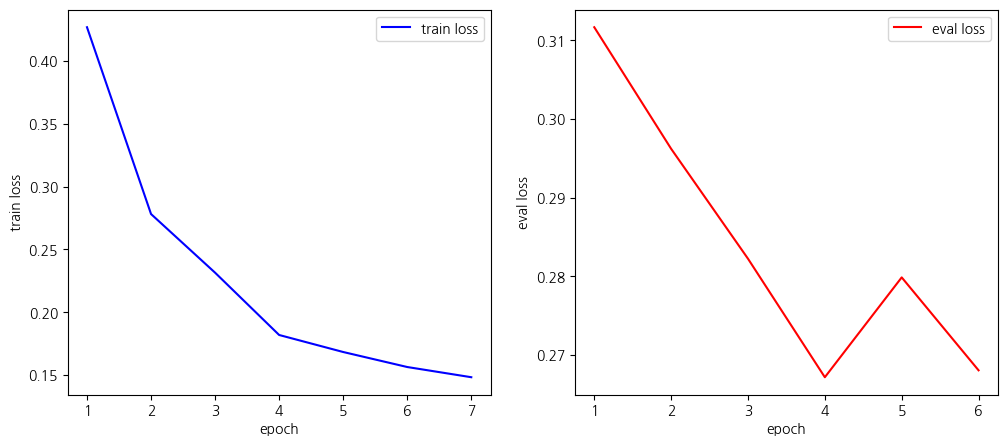

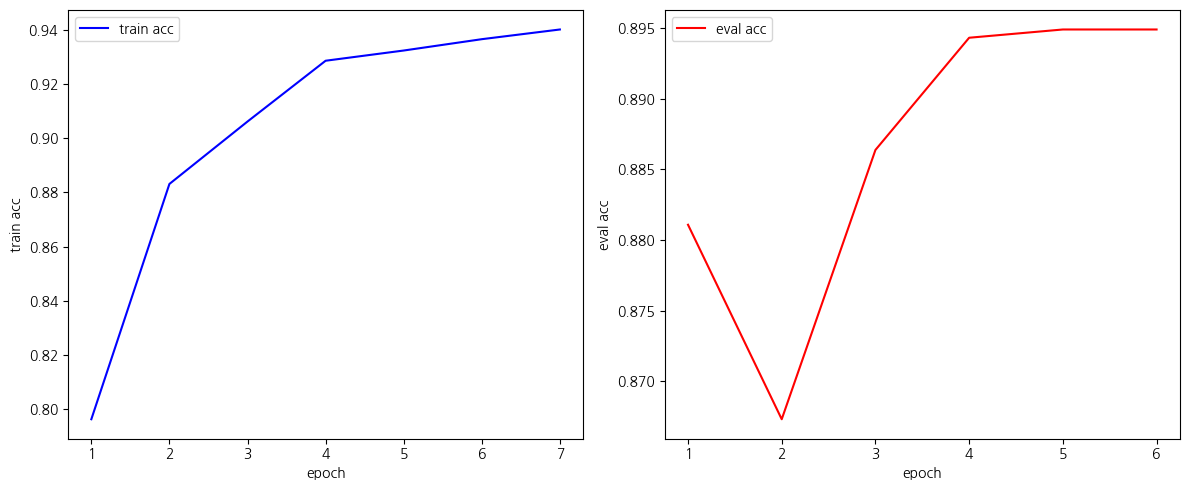

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.plot(range(1, 8), train_loss_list, label = 'train loss', color = 'blue')
ax1.legend()
ax1.set_ylabel('train loss')
ax1.set_xlabel('epoch')

ax2.plot(range(1, 7), eval_loss_list, label = 'eval loss', color = 'red')
ax2.legend()
ax2.set_ylabel('eval loss')
ax2.set_xlabel('epoch')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (12, 5))

ax3.plot(range(1, 8), train_acc_list, label = 'train acc', color = 'blue')
ax3.legend()
ax3.set_ylabel('train acc')
ax3.set_xlabel('epoch')

ax4.plot(range(1, 7), eval_acc_list, label = 'eval acc', color = 'red')
ax4.legend()
ax4.set_ylabel('eval acc')
ax4.set_xlabel('epoch')

plt.tight_layout()
plt.show()

In [ ]:
# heatmap

preds, trues = list(), list()

with torch.no_grad():
  for idx, batch in enumerate(test_dataloader):
    batch = tuple(t.to(DEVICE) for t in batch)
    input_ids, input_mask, labels = batch
    y_pred = model(input_ids, token_type_ids = None, attention_mask = input_mask)
    preds.extend([torch.argmax(predicted).cpu().detach().item() for predicted in y_pred.logits])
    trues.extend([label.cpu().item() for label in labels])

test_df = pd.DataFrame({'pred': preds, 'label': trues})
test_df

,pred,label
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
1880,1,0
1881,0,0
1882,0,0
1883,1,1


In [ ]:
import seaborn as sns

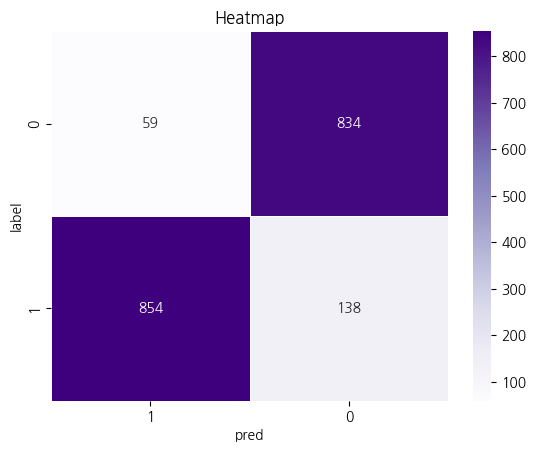

In [ ]:
confusion_matrix = pd.crosstab(test_df['label'], test_df['pred'])
confusion_matrix.index = test_df['pred'].unique()
confusion_matrix.columns = test_df['label'].unique()
confusion_matrix = confusion_matrix.iloc[::-1, :]

sns.heatmap(confusion_matrix, cmap = 'Purples', annot = True, linewidth = .5, fmt = ".0f")
plt.title("Heatmap")
plt.ylabel("label")
plt.xlabel("pred")
plt.show()

# AdapterHub 사용

In [ ]:
pip install git+https://github.com/adapter-hub/adapters.git

  Cloning https://github.com/adapter-hub/adapters.git to /tmp/pip-req-build-i6qzo11q
  Running command git clone --filter=blob:none --quiet https://github.com/adapter-hub/adapters.git /tmp/pip-req-build-i6qzo11q
  Resolved https://github.com/adapter-hub/adapters.git to commit 7d2da38ba02dffbb017b34a8e23462a8d40cb4ed
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 62.7 MB/s eta 0:00:00
  Created wheel for adapters: filename=adapters-1.0.0-py3-none-any.whl size=277874 sha256=3709648d9ee22ce77da319468e3d989b27076a36f011d749428a8e503a154ce6
  Stored in directory: /tmp/pip-ephem-wheel-cache-22n8hdfb/wheels/fb/e4/04/965f9b827d725f45b877b524030bc98ca46b819c2f86cb3f9b
Successfully built adapters
  Attempting uninsta

In [ ]:
pip install -qq adapters

In [ ]:
pip install -qq adapters datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
pip install pandas==2.1.4 pyarrow==14.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.21.0 requires pyarrow>=15.0.0, but you have pyarrow 14.0.1 which is incompatible.


In [ ]:
from datasets import load_dataset
dataset = load_dataset("csv", data_files="/content/drive/MyDrive/Euron/TeamProject/최종 데이터셋/preprocessing_final.csv")

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# None 값이 있는 행을 제거하는 필터링
dataset = dataset.filter(lambda x: x["processed_title"] is not None)

Filter:   0%|          | 0/9423 [00:00<?, ? examples/s]

In [ ]:
from transformers import BertTokenizer

# 토크나이저 초기화
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

# 배치를 인코딩하는 함수 정의
def encode_batch(batch):
    return tokenizer(batch["processed_title"], max_length=80, truncation=True, padding="max_length")

# 먼저 train/validation/test로 나누기 전에 원본 데이터셋을 인코딩
encoded_dataset = dataset.map(encode_batch, batched=True)

# 레이블 열 이름 변경
encoded_dataset = encoded_dataset.rename_column(original_column_name="label", new_column_name="labels")

# 데이터셋을 PyTorch 텐서로 변환
encoded_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Train/Test로 나누기
train_test_split = encoded_dataset['train'].train_test_split(test_size=0.2, seed=42)
train_dataset = train_test_split['train']
test_dataset = train_test_split['test']

# Train/Validation로 나누기
train_val_split = train_dataset.train_test_split(test_size=0.25, seed=42)
train_dataset = train_val_split['train']
val_dataset = train_val_split['test']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Map:   0%|          | 0/9257 [00:00<?, ? examples/s]

In [ ]:
import tensorflow as tf
import torch
from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from adapters import AutoAdapterModel

config = BertConfig.from_pretrained("bert-base-multilingual-cased",num_labels=2)
model = AutoAdapterModel.from_pretrained("bert-base-multilingual-cased", config=config)

#Add a new adapter
model.add_adapter("notice", config="seq_bn")

#Add a matching classification head
model.add_classification_head(
    "notice",
    num_labels=2,
    id2label={0:"진로 아님", 1: "진로"}
)

#Activate the adapter
model.train_adapter("notice")

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [ ]:
training_args = TrainingArguments(
    learning_rate=1e-4,
    num_train_epochs=6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    logging_steps=200,
    output_dir="./training_output",
    overwrite_output_dir=True,
    # The next line is important to ensure the dataset labels are properly passed to the model
    remove_unused_columns=False,
)

def compute_accuracy(p: EvalPrediction):
  preds = np.argmax(p.predictions, axis=1)
  return {"acc": (preds == p.label_ids).mean()}

trainer = AdapterTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_accuracy,
)

In [ ]:
trainer.train()

Step,Training Loss
200,0.490000
400,0.379500
600,0.316600
800,0.306100
1000,0.285400


TrainOutput(global_step=1044, training_loss=0.35201976582465044, metrics={'train_runtime': 301.3968, 'train_samples_per_second': 110.545, 'train_steps_per_second': 3.464, 'total_flos': 1404872261352000.0, 'train_loss': 0.35201976582465044, 'epoch': 6.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.2993907034397125,
 'eval_acc': 0.8774298056155507,
 'eval_runtime': 8.4326,
 'eval_samples_per_second': 219.624,
 'eval_steps_per_second': 6.878,
 'epoch': 6.0}

## prefix

In [ ]:
config=BertConfig.from_pretrained("bert-base-multilingual-cased",num_labels=2)
model_p=AutoAdapterModel.from_pretrained("bert-base-multilingual-cased", config=config)


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [ ]:
#Add a new adapter
from adapters import PrefixTuningConfig

config = PrefixTuningConfig(flat=False, prefix_length=30)
model_p.add_adapter("notice", config=config)

#Add a matching classification head
model_p.add_classification_head(
    "notice",
    num_labels=2,
    id2label={0:"진로 아님", 1: "진로"}
)

#Activate the adapter
model_p.train_adapter("notice")


trainer_p = AdapterTrainer(
    model=model_p,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_accuracy,
)

In [ ]:
trainer_p.train()

Step,Training Loss
200,0.494200
400,0.399900
600,0.348100
800,0.333800
1000,0.309200


TrainOutput(global_step=1044, training_loss=0.37410421846470154, metrics={'train_runtime': 336.7245, 'train_samples_per_second': 98.947, 'train_steps_per_second': 3.1, 'total_flos': 1548083409906240.0, 'train_loss': 0.37410421846470154, 'epoch': 6.0})

In [ ]:
trainer_p.evaluate()

{'eval_loss': 0.32044854760169983,
 'eval_acc': 0.8714902807775378,
 'eval_runtime': 8.6267,
 'eval_samples_per_second': 214.681,
 'eval_steps_per_second': 6.723,
 'epoch': 6.0}

## promt tuning

In [ ]:
from adapters import PromptTuningConfig
config=BertConfig.from_pretrained("bert-base-multilingual-cased",num_labels=2)
model=AutoAdapterModel.from_pretrained("bert-base-multilingual-cased", config=config)

config = PromptTuningConfig(prompt_length=10)
model.add_adapter("dummy", config=config)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [ ]:
#Add a new adapter
from adapters import PromptTuningConfig

#Add a matching classification head
model.add_classification_head(
    "dummy",
    num_labels=2,
    id2label={0:"진로 아님", 1: "진로"}
)

#Activate the adapter
model.train_adapter("dummy")


In [ ]:
from transformers import TrainingArguments, EvalPrediction
from adapters import AdapterTrainer

trainer = AdapterTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_accuracy,
)

In [ ]:
trainer.train()

Step,Training Loss
200,0.656700
400,0.623700
600,0.607900
800,0.597400
1000,0.588500


TrainOutput(global_step=1044, training_loss=0.6136116287260677, metrics={'train_runtime': 385.1474, 'train_samples_per_second': 86.507, 'train_steps_per_second': 2.711, 'total_flos': 1390566397078080.0, 'train_loss': 0.6136116287260677, 'epoch': 6.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.5322911143302917,
 'eval_acc': 0.7386609071274298,
 'eval_runtime': 10.4009,
 'eval_samples_per_second': 178.061,
 'eval_steps_per_second': 5.576,
 'epoch': 6.0}

## MAD-X

In [ ]:
from adapters import SeqBnInvConfig
from adapters import PromptTuningConfig
config=BertConfig.from_pretrained("bert-base-multilingual-cased",num_labels=2)
model=AutoAdapterModel.from_pretrained("bert-base-multilingual-cased", config=config)

config = SeqBnInvConfig()
model.add_adapter("lang_adapter", config=config)

#Add a matching classification head
model.add_classification_head(
    "notice",
    num_labels=2,
    id2label={0:"진로 아님", 1: "진로"}
)

#Activate the adapter
model.train_adapter("lang_adapter")


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [ ]:
import numpy as np
from transformers import TrainingArguments, EvalPrediction
from adapters import AdapterTrainer

training_args = TrainingArguments(
    learning_rate=3e-5,
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_steps=200,
    output_dir="./training_output",
    overwrite_output_dir=True,
    # The next line is important to ensure the dataset labels are properly passed to the model
    remove_unused_columns=False,
)

def compute_accuracy(p: EvalPrediction):
  preds = np.argmax(p.predictions, axis=1)
  return {"acc": (preds == p.label_ids).mean()}

trainer = AdapterTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_accuracy,
)

In [ ]:
trainer.train()

Step,Training Loss
200,0.616200
400,0.521700
600,0.484600
800,0.423400
1000,0.414200
1200,0.395000
1400,0.431100
1600,0.408700
1800,0.359800
2000,0.375500


TrainOutput(global_step=2780, training_loss=0.42102285975174936, metrics={'train_runtime': 259.7229, 'train_samples_per_second': 85.522, 'train_steps_per_second': 10.704, 'total_flos': 939738070880640.0, 'train_loss': 0.42102285975174936, 'epoch': 4.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.3618350625038147,
 'eval_acc': 0.8525917926565875,
 'eval_runtime': 9.5287,
 'eval_samples_per_second': 194.36,
 'eval_steps_per_second': 24.347,
 'epoch': 4.0}

## MAD-X + prefixTuningConfig

In [ ]:
import numpy as np
from transformers import TrainingArguments, EvalPrediction
from adapters import AdapterTrainer
from adapters import PrefixTuningConfig
from adapters import SeqBnInvConfig
from adapters import PromptTuningConfig
config=BertConfig.from_pretrained("bert-base-multilingual-cased",num_labels=2)
model=AutoAdapterModel.from_pretrained("bert-base-multilingual-cased", config=config)

config = SeqBnInvConfig()
model.add_adapter("lang_adapter", config=config)

#Add a matching classification head
model.add_classification_head(
    "notice",
    num_labels=2,
    id2label={0:"진로 아님", 1: "진로"}
)

#Activate the adapter
model.train_adapter("lang_adapter")

# 모델에 Prefix Tuning 어댑터 추가
config = PrefixTuningConfig(flat=False, prefix_length=30)
model.add_adapter("prefix", config=config)

# 해당 어댑터에 맞는 분류 헤드 추가
model.add_classification_head(
    "prefix",
    num_labels=2,
    id2label={0: "진로 아님", 1: "진로"}
)

# 어댑터 활성화
model.train_adapter("prefix")

# TrainingArguments 설정
training_args = TrainingArguments(
    learning_rate=3e-5,
    num_train_epochs=6,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_steps=200,
    output_dir="./training_output",
    overwrite_output_dir=True,
    # The next line is important to ensure the dataset labels are properly passed to the model
    remove_unused_columns=False,
)

# 평가 메트릭 정의
def compute_accuracy(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    return {"acc": (preds == p.label_ids).mean()}

# AdapterTrainer 설정
trainer = AdapterTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_accuracy,
)

# 훈련 시작
trainer.train()


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Step,Training Loss
200,0.614400
400,0.463700
600,0.420900
800,0.421200
1000,0.393100
1200,0.371200
1400,0.391200
1600,0.362900
1800,0.360000
2000,0.357200


TrainOutput(global_step=2088, training_loss=0.41249526597530906, metrics={'train_runtime': 393.9196, 'train_samples_per_second': 84.581, 'train_steps_per_second': 5.301, 'total_flos': 1576593841072320.0, 'train_loss': 0.41249526597530906, 'epoch': 6.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.3669509291648865,
 'eval_acc': 0.8450323974082073,
 'eval_runtime': 11.6519,
 'eval_samples_per_second': 158.943,
 'eval_steps_per_second': 9.955,
 'epoch': 6.0}